# Kijk dit nou :D

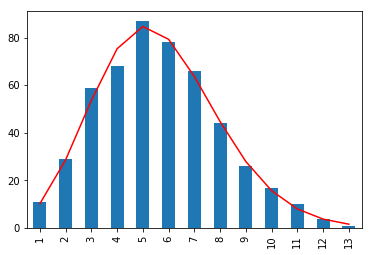

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats
import math

sample = pd.DataFrame.from_csv('Sample.tsv', sep='\t', index_col=None)
reg = sample.loc[sample['DistributionPattern'] == 'Random']

fig, ax = plt.subplots()
val_counts = reg['NumberOfOrganisms'].value_counts(sort=False)

mean_organisms = reg['NumberOfOrganisms'].mean()
std_organisms = reg['NumberOfOrganisms'].std()

euler = math.exp(1)
poisson_list = []

for value, count in val_counts.items():
    p = (mean_organisms ** value * euler ** -mean_organisms) / (math.factorial(value))
    p *= 500
    poisson_list.append(p)

value_counts = [value for value in val_counts]

chi_square = 0
for value, predicted in zip(value_counts, poisson_list):
    chi_square += ((value - predicted) ** 2) / predicted


val_counts.plot(ax=ax, kind='bar')
ax.plot(poisson_list, color='red')
plt.show()

[2.2926617683037396, 9.963277349989113, 22.747636652798072, 26.582944443640759, 34.679705335419762, 30.844397544577074, 25.730653823453494, 16.355457001393592, 8.6848414197082171, 4.8495336288655304, 1.8665164582101075, -0.69035540235168369, -1.9687913326325792]


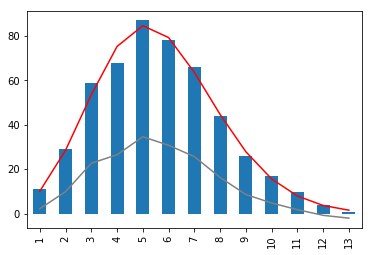

In [6]:
ax.plot(normal_distributions, color='gray')
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.show()
    